In [155]:
def boxplot(
            bmin = 0, 
            bmax = 50, 
            lines = False, 
            samples = 3, 
            boxsize = (10,5),
            file = "example.fastq",
            legend = True
            ):
    
    #### borrowed from fastq_to_fasta.py
    fastq=open(file,"r").read()
    fasta=list()
    total=len(open(file,"r").readlines())
    for i in range(total):
        if i%4==0 or i%4==1: fasta.append(fastq.split("\n")[i])
    out=open("output.fasta","w")
    for i in range(0,len(fasta),2): 
        out.write("".join(map(str,fasta[i])).replace("@",">")+"\n"+"".join(map(str,fasta[i+1]))+"\n")
    ####################################
    
    #### Sequences and Phred scores...
    seq_list=(open("output.fasta","r").read()).split("\n")
    dna_list=list()
    for row in range(1,len(seq_list),2): 
        dna_list.append(seq_list[row])
    phred_list=(open(file,"r").read()).split("\n")
    qualities=list()
    for i in range(0,len(phred_list)):
        if i%4==3: qualities.append(phred_list[i])
    ####################################
    
    #### ASCII quality scores to numbers
    score_list=list()
    for i in range(len(qualities)):
        phred=qualities[i]
        scores=[]
        for x in range(len(phred)): scores.append(ord(phred[x])-33)
        score_list.append(scores)  
    ####################################

    seq_names=[]
    for index in range(len(fasta)):
        if index%2==0:
            seq_names.append(fasta[index])
    
    if len(score_list)<=samples:
        samples=len(score_list)

    min_len=min(len(score_list[index]) for index in range(len(score_list)))
    
    #### Sequence and Quality scores in one dictionary
    data_dict={}
    if min_len > bmax-bmin:
        for base_index in range(bmin+1,bmax):
            scores=list()
            for sequence_index in range(samples):
                scores.append((score_list[sequence_index])[base_index])
            data_dict.update({base_index:scores})
    else:
        for base_index in range(min_len):
            scores=list()
            for sequence_index in range(samples):
                scores.append((score_list[sequence_index])[base_index])
            data_dict.update({base_index:scores})
    ##################################################
    
    # template
    import matplotlib.pyplot as plt
    fig,ax=plt.subplots(figsize=boxsize,sharey=True,sharex=True)

    # Plots of fastqs
    if lines:
        if min_len > bmax-bmin:
            for index in range(samples): 
                ax.plot(range(bmin,bmax),score_list[index][bmin:bmax], label=seq_names[index])
        else:
            for index in range(samples): 
                ax.plot(range(len(score_list[index])),score_list[index], label=seq_names[index])
        if legend: 
            ax.legend(fontsize=10)
    
    # Boxplots of fastqs
    ax.boxplot(data_dict.values(),labels=data_dict.keys())
    ax.set_title('Quality Control Box Plot', fontsize=15)
    ax.set_xlabel("Base Indexes")
    ax.set_ylabel("Quality Scores")
    plt.show()

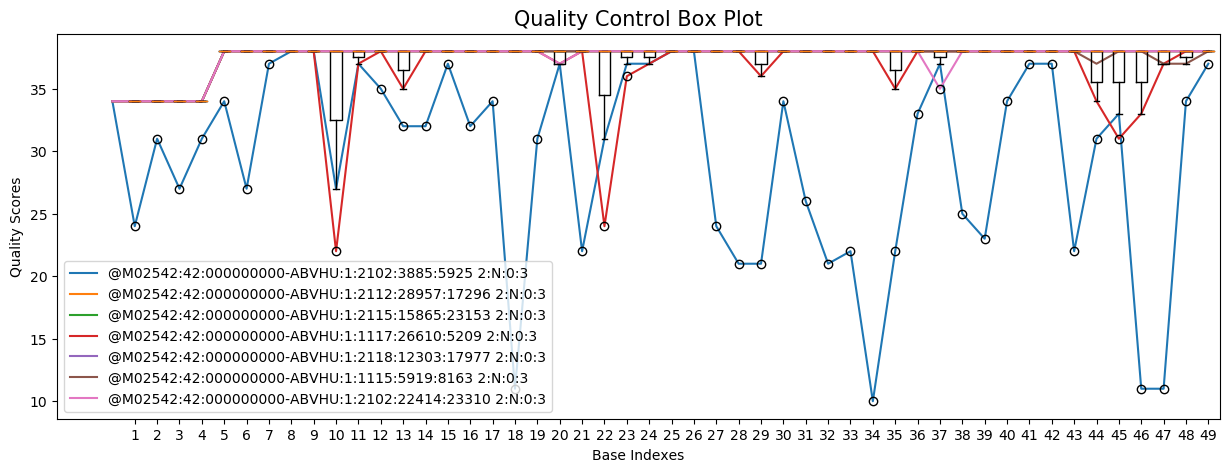

In [162]:
boxplot(lines=True,
        legend=True,
        samples=7,
        bmin=0,
        bmax=50,
        boxsize=(15,5))